Credits - https://github.com/bansalkanav/Machine_Learning_and_Deep_Learning

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Multiple Linear Regression

We will see how to do Multiple Linear Regression using the following approaches:

1. Build a Multiple Linear Regression Model using `statsmodels`
    - Load the data
    - Understanding the data (EDA)
    - Data Preparation (Train Test Split)
    - Use `statsmodel` on the data and train the Model
    - Manual Feature Selection based on p value and VIF - (`Forward Feature Selection`, `Backward Feature Selection`)
    - Resdual Analysis on Train Data
    - Prediction on Test Data
    - Evaluation - (RMSE, R_squared)
2. Build a MLR Model using `sklearn`
    - Load the data
    - Understanding the data (EDA)
    - Data Preparation (Train Test Split)
    - Use `sklearn` in order to train the model
    - Resdual Analysis on Train Data
    - Prediction on Test Data
    - Evaluation - (RMSE, R_squared)
3. Automatic Feature Selection using `RFE`
4. Dimensionality Reduction with `PCA`
5. Feature Selection using `Lasso Regularisation`
6. Feature Importance using `Ensembles`

# 1. Build a Multiple Linear Regression Model using `statsmodels`

### Load the Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

In [9]:
california = fetch_california_housing()

print(type(california))

<class 'sklearn.utils._bunch.Bunch'>


### Understanding and Viz

In [10]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [12]:
df = pd.DataFrame(california.data)

df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
df.columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

In [15]:
df['Price'] = california.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Price,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [17]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

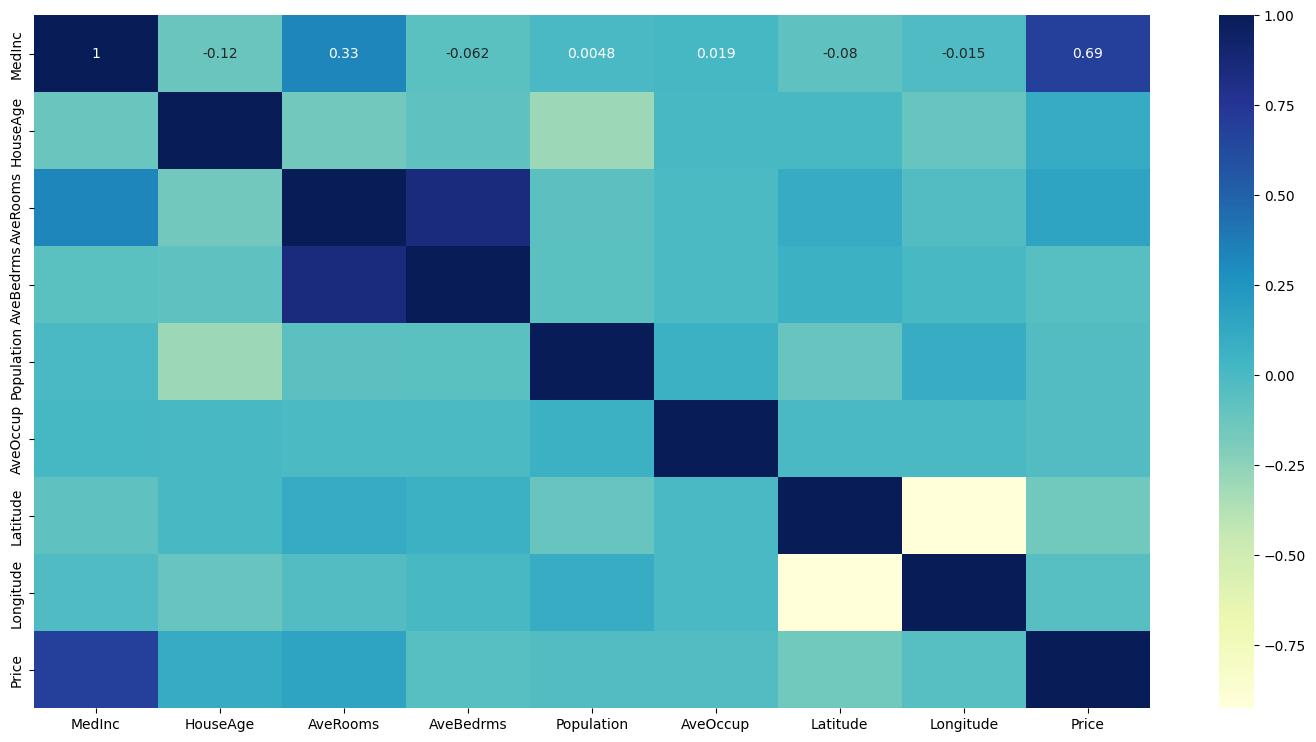

In [18]:
plt.figure(figsize=(18, 9))

sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

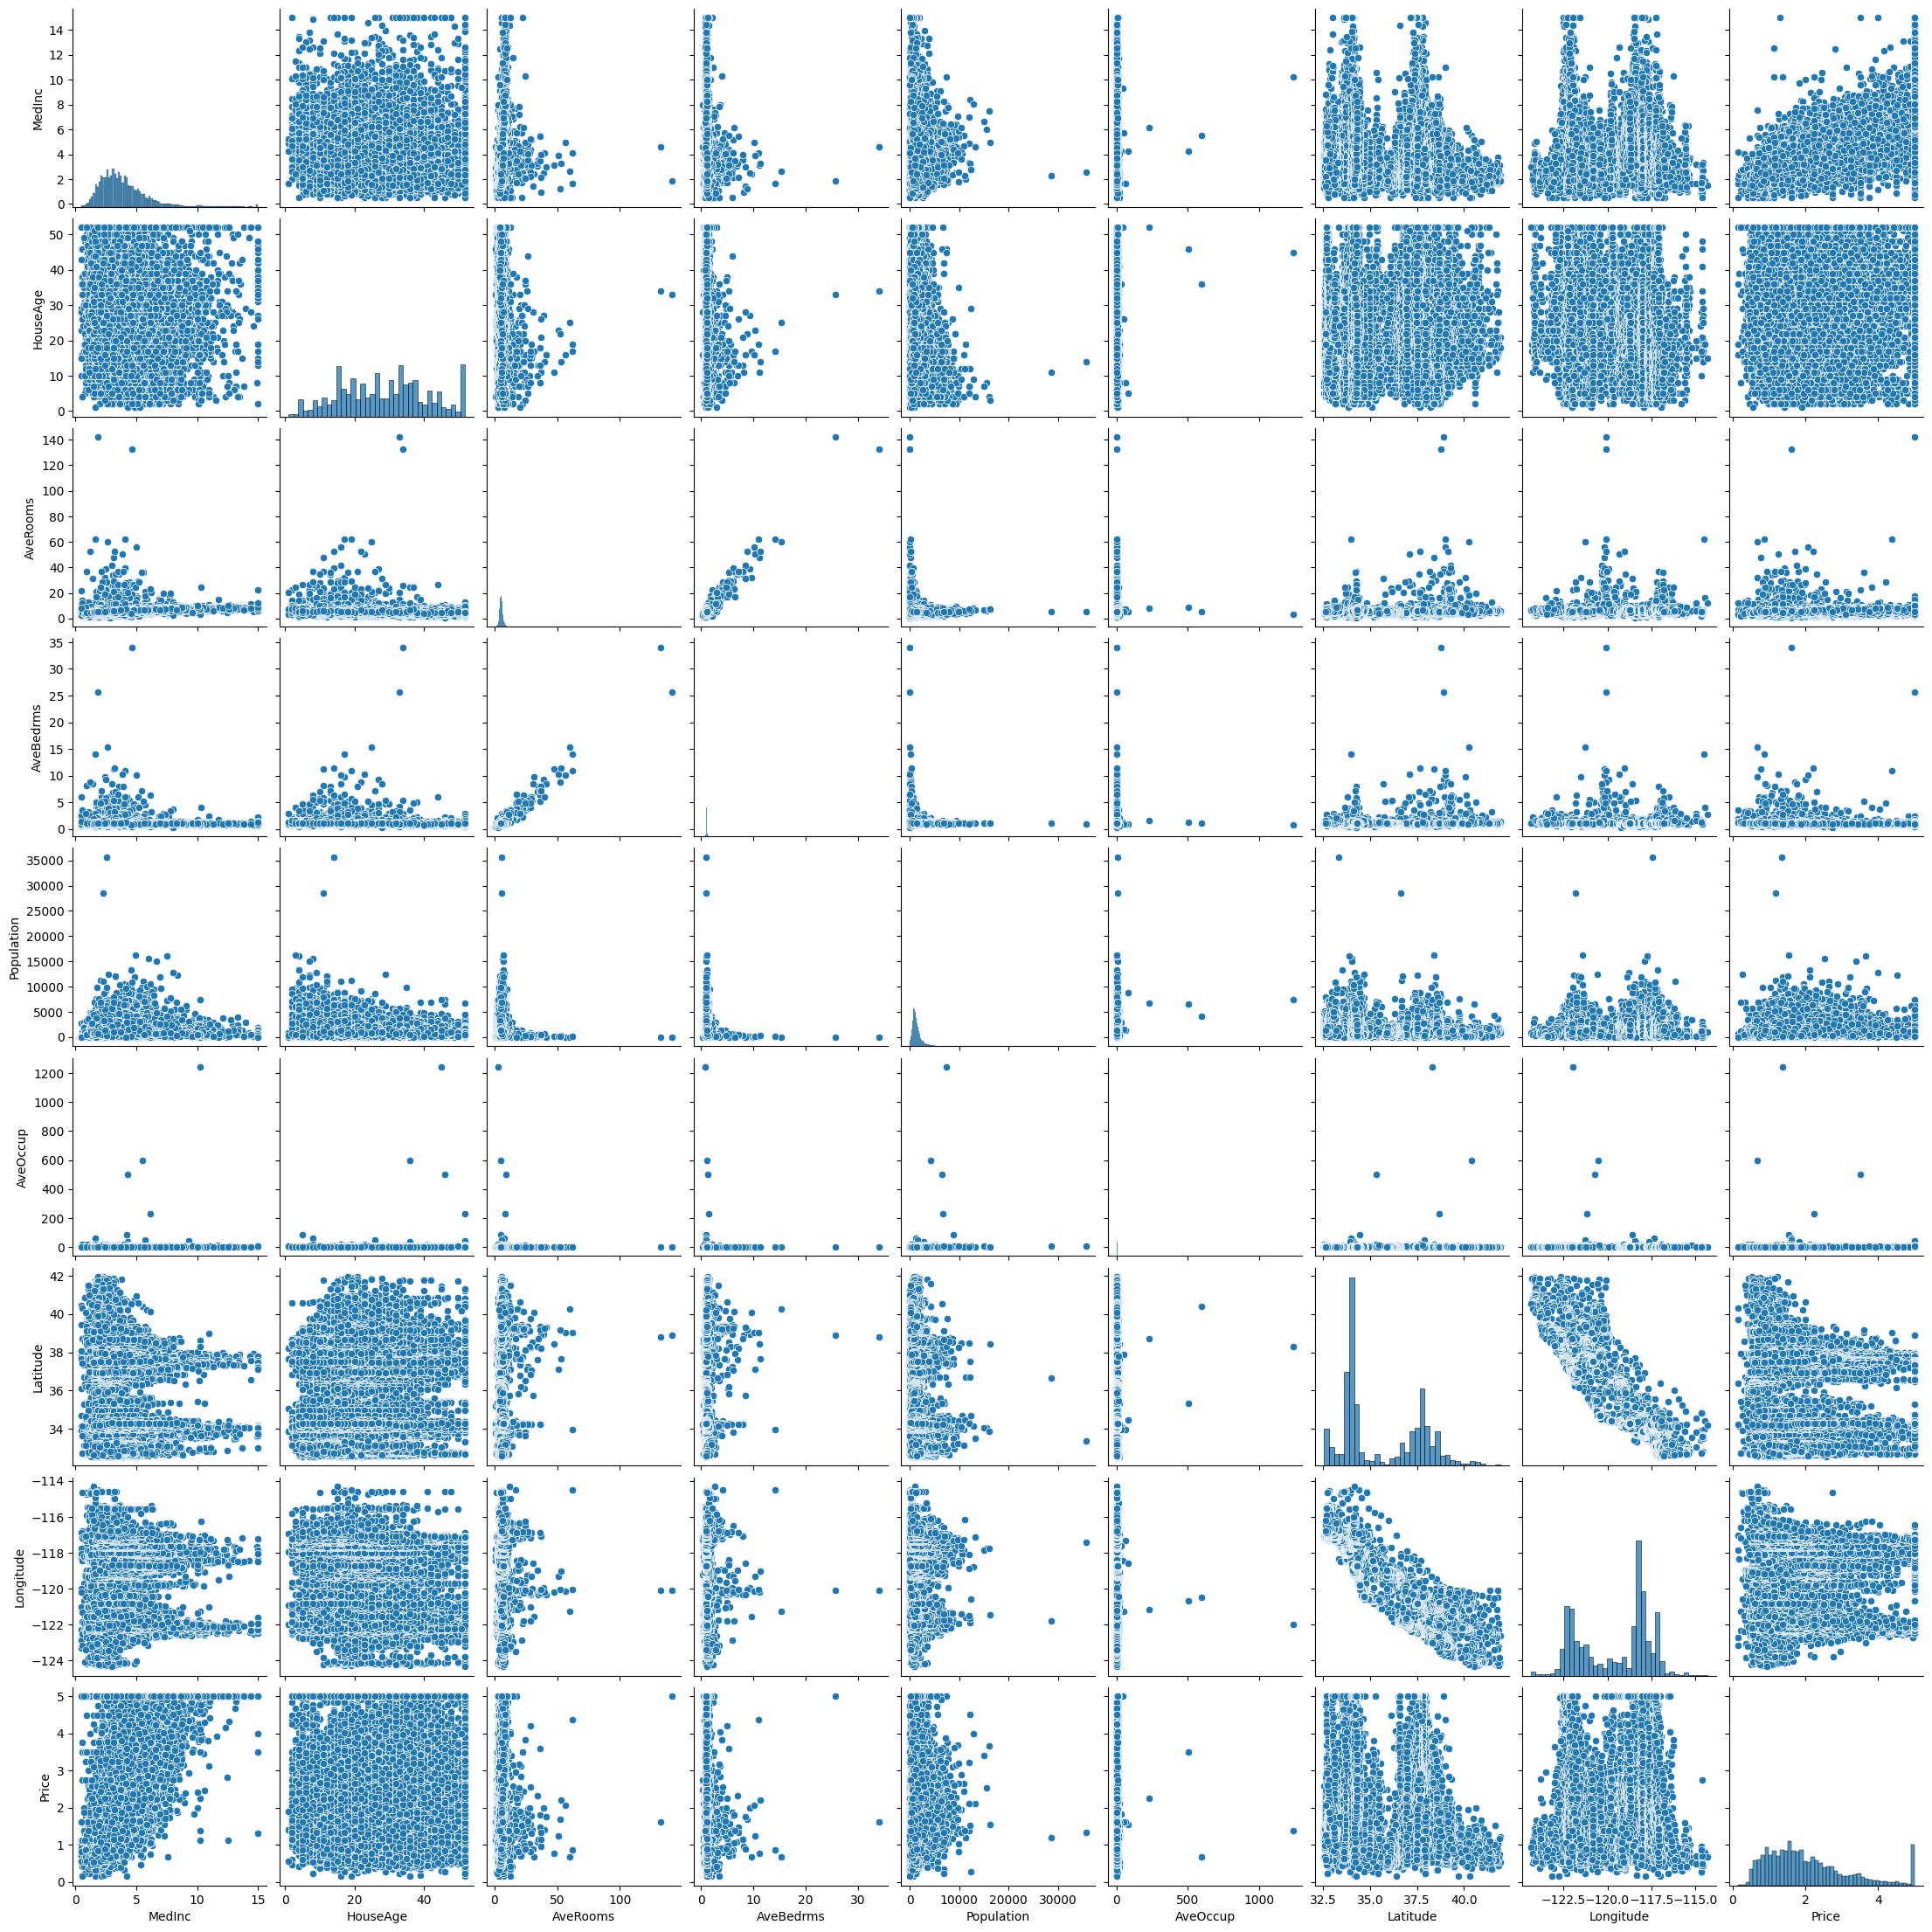

In [19]:
sns.pairplot(df)

In [20]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

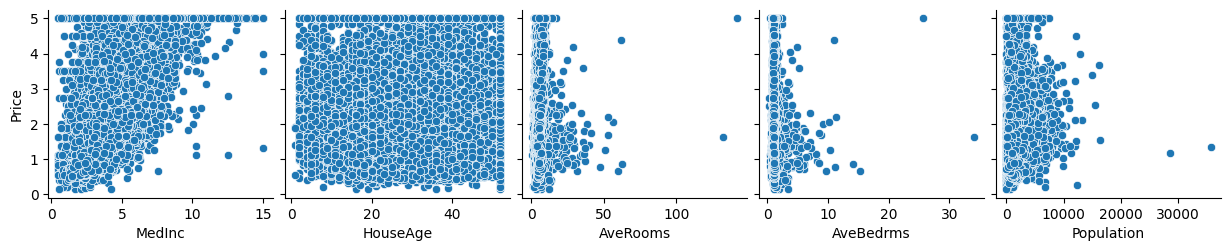

In [22]:
sns.pairplot(data = df,
            x_vars = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population'],
            y_vars = 'Price')

### Data Preparation

In [23]:
# Train test split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.8, \
                                                    random_state=0)

print(df_train.shape)
print(df_test.shape)

(16512, 9)
(4128, 9)


## Training using `statsmodel`

In [24]:
y_train = df_train.pop('Price')
X_train = df_train

In [25]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12069,4.2386,6.0,7.723077,1.169231,228.0,3.507692,33.83,-117.55
15925,4.3898,52.0,5.326622,1.100671,1485.0,3.322148,37.73,-122.44
11162,3.9333,26.0,4.668478,1.046196,1022.0,2.777174,33.83,-118.00
4904,1.4653,38.0,3.383495,1.009709,749.0,3.635922,34.01,-118.26
4683,3.1765,52.0,4.119792,1.043403,1135.0,1.970486,34.08,-118.36


In [26]:
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [27]:
lr.params

const        -36.858569
MedInc         0.433333
HouseAge       0.009293
AveRooms      -0.098643
AveBedrms      0.593215
Population    -0.000008
AveOccup      -0.004745
Latitude      -0.421449
Longitude     -0.434166
dtype: float64

In [28]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     3212.
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:53:15   Log-Likelihood:                -18085.
No. Observations:               16512   AIC:                         3.619e+04
Df Residuals:                   16503   BIC:                         3.626e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.8586      0.737    -49.994      0.000     -38.304     -35.413
MedInc         0.4333      0.005     92.651      0.000       0.424       0.443
HouseAge       0.0093      0.000     18.651      0.000       0.008       0.010
AveRooms      -0.0986      0.007    -15.013      0.000      -0.112      -0.086
AveBedrms      0.5932      0.031     19.068      0.000       0.532       0.654
Population -7.562e-06   5.26e-06     -1.437      0.151   -1.79e-05    2.75e-06
AveOccup      -0.0047      0.001     -5.404      0.000      -0.006      -0.003
Latitude      -0.4214      0.008    -52.340      0.000      -0.437      -0.406
Longitude     -0.4342      0.008    -51.498      0.000      -0.451      -0.418
==============================================================================
Omnibus:                     3453.723   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10941.189
Skew:                           1.067   Prob(JB):                         0.00
Kurtosis:                       6.369   Cond. No.                     2.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Understanding the above statistical summary about the model**  

We are interested in below mentioned values:
1. The coefficient and its p - value
2. R - Square value
3. p - value of F Statistics

**1. If the p-value of coefficient of any feature is less than 0.05, it means it is statistically significant**  

Looks like `INDUS` and `AGE` columns can be removed. 

**2. R Square value is 0.773**

i.e. 77.3 % variance in `Price` is explained by all the features. 

**3. Observe that F Statistics has a very low p-value**

This means that the complete model is statistically significant. 

## Forward Feature Selection

In [24]:
import statsmodels.api as sm

# Add a constant
X_train_sm = sm.add_constant(X_train[['RM']])

# Create a first model
lr = sm.OLS(y_train, X_train_sm).fit()

In [25]:
lr.params

const   -36.476190
RM        9.376384
dtype: float64

In [26]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     397.3
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           5.64e-62
Time:                        19:37:22   Log-Likelihood:                -1332.2
No. Observations:                 404   AIC:                             2668.
Df Residuals:                     402   BIC:                             2676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.4762      2.982    -12.231      0.000     -42.339     -30.613
RM             9.3764      0.470     19.933      0.000       8.452      10.301
==============================================================================
Omnibus:                       66.615   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.894
Skew:                           0.458   Prob(JB):                    6.12e-100
Kurtosis:                       8.129   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

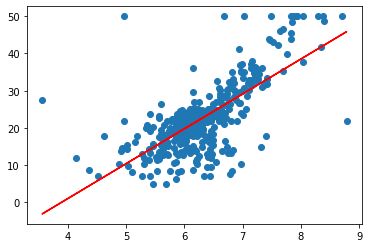

In [27]:
plt.scatter(X_train_sm.loc[:, 'RM'], y_train)

plt.plot(X_train_sm.loc[:, 'RM'], -36.476190 + 9.376384 * X_train_sm.loc[:, 'RM'], 'r')

plt.show()

In [28]:
# Add LSTAT to the data and try to rebuild the model

X_train_sm = sm.add_constant(X_train[['RM', 'LSTAT']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm).fit()

In [29]:
lr.params

const   -1.262529
RM       5.109068
LSTAT   -0.654949
dtype: float64

In [30]:
np.round(lr.pvalues, 3)

const    0.719
RM       0.000
LSTAT    0.000
dtype: float64

In [31]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     392.5
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           3.83e-95
Time:                        19:37:25   Log-Likelihood:                -1252.0
No. Observations:                 404   AIC:                             2510.
Df Residuals:                     401   BIC:                             2522.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2625      3.513     -0.359      0.719      -8.168       5.643
RM             5.1091      0.492     10.379      0.000       4.141       6.077
LSTAT         -0.6549      0.047    -13.979      0.000      -0.747      -0.563
==============================================================================
Omnibus:                       88.171   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.848
Skew:                           1.088   Prob(JB):                     2.71e-46
Kurtosis:                       5.780   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Backward Feature Selection

In [32]:
# Lets add all the variables and see

X_train_sm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const      38.091695
CRIM       -0.119443
ZN          0.044780
INDUS       0.005485
CHAS        2.340804
NOX       -16.123604
RM          3.708709
AGE        -0.003121
DIS        -1.386397
RAD         0.244178
TAX        -0.010990
PTRATIO    -1.045921
B           0.008110
LSTAT      -0.492793
dtype: float64

In [33]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     102.2
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          9.64e-117
Time:                        19:37:25   Log-Likelihood:                -1171.5
No. Observations:                 404   AIC:                             2371.
Df Residuals:                     390   BIC:                             2427.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.0917      5.522      6.898      0.000      27.234      48.949
CRIM          -0.1194      0.037     -3.257      0.001      -0.192      -0.047
ZN             0.0448      0.014      3.102      0.002       0.016       0.073
INDUS          0.0055      0.063      0.087      0.931      -0.119       0.130
CHAS           2.3408      0.902      2.595      0.010       0.567       4.115
NOX          -16.1236      4.212     -3.828      0.000     -24.404      -7.843
RM             3.7087      0.458      8.106      0.000       2.809       4.608
AGE           -0.0031      0.014     -0.218      0.828      -0.031       0.025
DIS           -1.3864      0.214     -6.480      0.000      -1.807      -0.966
RAD            0.2442      0.070      3.481      0.001       0.106       0.382
TAX           -0.0110      0.004     -2.819      0.005      -0.019      -0.003
PTRATIO       -1.0459      0.137     -7.636      0.000      -1.315      -0.777
B              0.0081      0.003      2.749      0.006       0.002       0.014
LSTAT         -0.4928      0.054     -9.086      0.000      -0.599      -0.386
==============================================================================
Omnibus:                      141.494   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.882
Skew:                           1.470   Prob(JB):                    1.67e-137
Kurtosis:                       8.365   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observation**

Looking at the p-values of some of the variables(like `INDUS`, `AGE`), it is clear that they are not statistically significant.

Lets try to look at VIFs along with this to be sure before dropping any variable from the data.

### Variance Infllation Factor (VIF)

VIF estimates the inflation in regression coefficients due to multicollinearity. VIFs are calculated by taking a predictor, and regressing it against every other predictor in the model. The numerical value for VIF gives what percentage of variance is inflated for each coefficient. As a thumb rule, VIF greater than 5.0 indicates a highly correlated variable. Therefore, those highly correlated variables must be removed for a good prediction model.

The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,CRIM,2.10
1,ZN,2.93
2,INDUS,13.94
3,CHAS,1.14
4,NOX,80.58
5,RM,81.17
6,AGE,22.84
7,DIS,14.80
8,RAD,14.92
9,TAX,58.05


In [36]:
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,PTRATIO,87.89
5,RM,81.17
4,NOX,80.58
9,TAX,58.05
6,AGE,22.84
11,B,21.83
8,RAD,14.92
7,DIS,14.80
2,INDUS,13.94
12,LSTAT,11.32


In [37]:
np.round(lr.pvalues, 3)

const      0.000
CRIM       0.001
ZN         0.002
INDUS      0.931
CHAS       0.010
NOX        0.000
RM         0.000
AGE        0.828
DIS        0.000
RAD        0.001
TAX        0.005
PTRATIO    0.000
B          0.006
LSTAT      0.000
dtype: float64

In [38]:
X = X_train.copy()

In [39]:
X = X.drop('AGE', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const      0.000
CRIM       0.001
ZN         0.002
INDUS      0.928
CHAS       0.010
NOX        0.000
RM         0.000
DIS        0.000
RAD        0.001
TAX        0.005
PTRATIO    0.000
B          0.006
LSTAT      0.000
dtype: float64
####################
   Features    VIF
9   PTRATIO  87.88
5        RM  78.24
4       NOX  73.45
8       TAX  58.04
10        B  21.69
7       RAD  14.89
2     INDUS  13.93
6       DIS  13.07
11    LSTAT   9.95
1        ZN   2.86
0      CRIM   2.10
3      CHAS   1.14


In [40]:
X = X.drop('INDUS', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const      0.000
CRIM       0.001
ZN         0.002
CHAS       0.009
NOX        0.000
RM         0.000
DIS        0.000
RAD        0.000
TAX        0.002
PTRATIO    0.000
B          0.006
LSTAT      0.000
dtype: float64
####################
   Features    VIF
8   PTRATIO  85.98
4        RM  74.88
3       NOX  67.90
7       TAX  45.96
9         B  21.63
6       RAD  13.44
5       DIS  12.09
10    LSTAT   9.92
1        ZN   2.84
0      CRIM   2.10
2      CHAS   1.13


In [41]:
X = X.drop('PTRATIO', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const    0.004
CRIM     0.004
ZN       0.000
CHAS     0.003
NOX      0.057
RM       0.000
DIS      0.000
RAD      0.019
TAX      0.000
B        0.032
LSTAT    0.000
dtype: float64
####################
  Features    VIF
3      NOX  67.81
4       RM  59.15
7      TAX  42.73
8        B  19.83
6      RAD  13.44
5      DIS   9.69
9    LSTAT   8.62
1       ZN   2.36
0     CRIM   2.10
2     CHAS   1.12


In [42]:
X = X.drop('NOX', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const    0.026
CRIM     0.006
ZN       0.000
CHAS     0.004
RM       0.000
DIS      0.000
RAD      0.025
TAX      0.000
B        0.021
LSTAT    0.000
dtype: float64
####################
  Features    VIF
6      TAX  37.30
3       RM  31.66
7        B  19.43
5      RAD  13.39
4      DIS   8.55
8    LSTAT   6.38
1       ZN   2.30
0     CRIM   2.08
2     CHAS   1.12


In [43]:
X = X.drop('TAX', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const    0.599
CRIM     0.014
ZN       0.000
CHAS     0.001
RM       0.000
DIS      0.000
RAD      0.006
B        0.017
LSTAT    0.000
dtype: float64
####################
  Features    VIF
3       RM  27.01
6        B  19.02
4      DIS   8.43
7    LSTAT   5.15
5      RAD   4.38
1       ZN   2.30
0     CRIM   2.07
2     CHAS   1.11


In [44]:
X = X.drop('RM', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const    0.000
CRIM     0.065
ZN       0.000
CHAS     0.000
DIS      0.000
RAD      0.026
B        0.225
LSTAT    0.000
dtype: float64
####################
  Features   VIF
5        B  8.17
3      DIS  7.60
6    LSTAT  4.96
4      RAD  3.71
1       ZN  2.28
0     CRIM  2.07
2     CHAS  1.10


### Residual Analysis on Training Data

In [45]:
y_train_pred = lr.predict(X_train_sm)

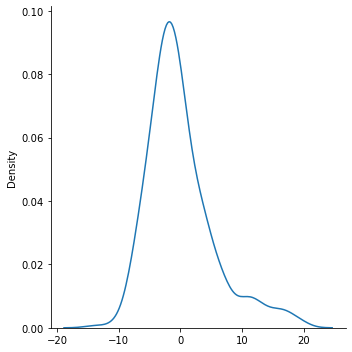

In [46]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde')

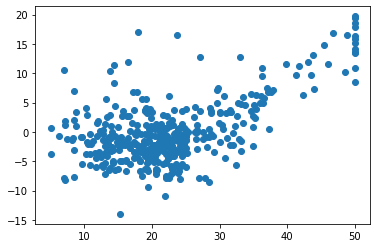

In [47]:
plt.scatter(y_train, residual)

plt.show()

<AxesSubplot:xlabel='Price', ylabel='Count'>

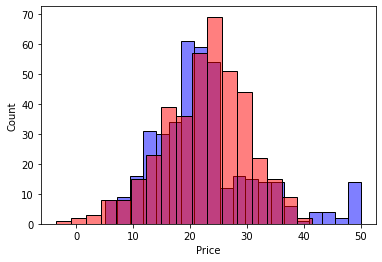

In [48]:
import seaborn as sns

sns.histplot(y_train, color='blue', alpha=0.5)
sns.histplot(y_train_pred, color='red', alpha=0.5)

### Making the Prediction

In [49]:
df_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [50]:
y_test = df_test.pop('Price')

X_test = df_test

In [51]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


In [52]:
X_train_sm.columns

Index(['const', 'CRIM', 'ZN', 'CHAS', 'DIS', 'RAD', 'B', 'LSTAT'], dtype='object')

In [53]:
cols = ['CRIM', 'ZN', 'CHAS', 'DIS', 'RAD', 'B', 'LSTAT']

X_test = X_test[cols]

In [54]:
X_test.head()

,CRIM,ZN,CHAS,DIS,RAD,B,LSTAT
329,0.06724,0.0,0.0,5.2146,4.0,375.21,7.34
371,9.23230,0.0,0.0,1.1691,24.0,366.15,9.53
219,0.11425,0.0,1.0,3.3633,5.0,393.74,10.50
403,24.80170,0.0,0.0,1.7028,24.0,396.90,19.77
78,0.05646,0.0,0.0,5.0141,5.0,386.40,12.34


In [55]:
X_test_sm = sm.add_constant(X_test)

In [56]:
X_test_sm.shape

(102, 8)

In [57]:
y_test_pred = lr.predict(X_test_sm)

<AxesSubplot:xlabel='Price', ylabel='Count'>

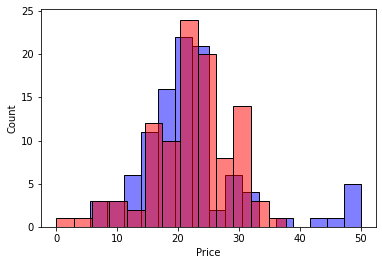

In [58]:
import seaborn as sns

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [59]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4.551734910328162
Mean Squared Error:  43.681204470866696
Root Mean Squared Error:  6.609175778481512


In [60]:
print(metrics.r2_score(y_test, y_test_pred))

0.4635632836132145


# 2. Building the MLR Model using `sklearn` 

In [61]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Residual Analysis on Training Data

In [63]:
y_train_pred = regressor.predict(X_train)

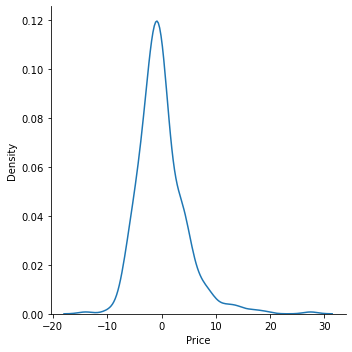

In [64]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde')

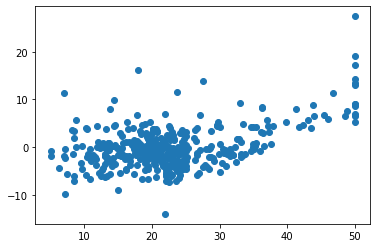

In [65]:
plt.scatter(y_train, residual)

plt.show()

<AxesSubplot:xlabel='Price', ylabel='Count'>

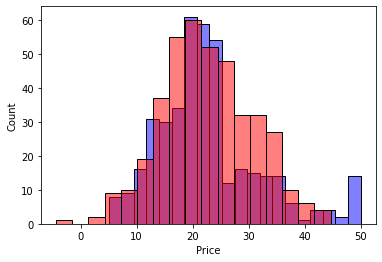

In [66]:
import seaborn as sns

sns.histplot(y_train, color='blue', alpha=0.5)
sns.histplot(y_train_pred, color='red', alpha=0.5)

### Making Prediction

In [67]:
X_test = df_test

In [68]:
y_test_pred = regressor.predict(X_test)

In [69]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
329,22.6,24.889638
371,50.0,23.721411
219,23.0,29.364999
403,8.3,12.122386
78,21.2,21.443823
...,...,...
56,24.7,25.442171
455,14.1,15.571783
60,18.7,17.937195
213,28.1,25.305888


<AxesSubplot:xlabel='Price', ylabel='Count'>

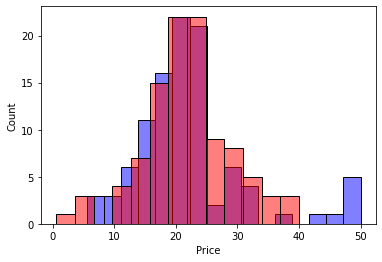

In [70]:
import seaborn as sns

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

### Evaluation

In [63]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3.8429092204445046
Mean Squared Error:  33.448979997676524
Root Mean Squared Error:  5.783509315085134


In [64]:
print(metrics.r2_score(y_test, y_test_pred))

0.589222384918251


<AxesSubplot:xlabel='Price'>

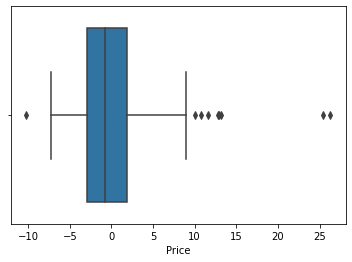

In [65]:
residual_test = y_test - y_test_pred

sns.boxplot(x = residual_test)

## 3. Automatic Feature Selection (RFE - Recursive Feature Elimination)

In [66]:
from sklearn.linear_model import LinearRegression

regressor_temp = LinearRegression()

In [67]:
from sklearn.feature_selection import RFE

rfe = RFE(regressor_temp, n_features_to_select=7)

rfe = rfe.fit(X_train, y_train)

In [68]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df

,Columns,Included,Ranking
0,CRIM,True,1
1,ZN,False,3
2,INDUS,False,6
3,CHAS,True,1
4,NOX,True,1
5,RM,True,1
6,AGE,False,7
7,DIS,True,1
8,RAD,False,2
9,TAX,False,4


In [69]:
imp_col = X_train.columns[rfe.support_]

imp_col

Index(['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')

In [70]:
X_train_rfe = df_train[imp_col]

X_train_rfe.head()

,CRIM,CHAS,NOX,RM,DIS,PTRATIO,LSTAT
220,0.35809,1.0,0.507,6.951,2.8617,17.4,9.71
71,0.15876,0.0,0.413,5.961,5.2873,19.2,9.88
240,0.11329,0.0,0.428,6.897,6.3361,16.6,11.38
6,0.08829,0.0,0.524,6.012,5.5605,15.2,12.43
417,25.94060,0.0,0.679,5.304,1.6475,20.2,26.64


In [71]:
from sklearn.linear_model import LinearRegression
regressor_rfe = LinearRegression()
regressor_rfe.fit(X_train_rfe, y_train)

LinearRegression()

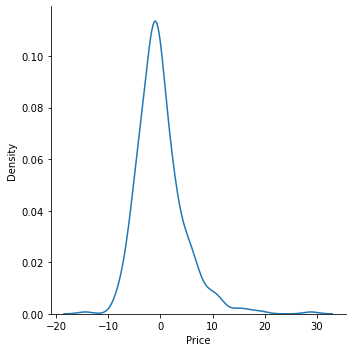

In [72]:
y_train_pred_rfe = regressor_rfe.predict(X_train_rfe)

residual = y_train - y_train_pred_rfe

sns.displot(residual, kind='kde')

In [73]:
X_test_rfe = df_test[imp_col]

y_test_pred_rfe = regressor_rfe.predict(X_test_rfe)

In [74]:
temp_df_rfe = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_rfe})
temp_df_rfe

,Actual,Predicted
329,22.6,27.565362
371,50.0,22.721940
219,23.0,29.759904
403,8.3,10.920656
78,21.2,23.120891
...,...,...
56,24.7,24.874779
455,14.1,17.040353
60,18.7,16.976280
213,28.1,25.565831


In [75]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_rfe))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_rfe))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfe)))

Mean Absolute Error:  4.107023542900277
Mean Squared Error:  36.90657461458284
Root Mean Squared Error:  6.075078157076074


In [76]:
print(metrics.r2_score(y_test, y_test_pred_rfe))

0.5467606276165057


<AxesSubplot:xlabel='Price'>

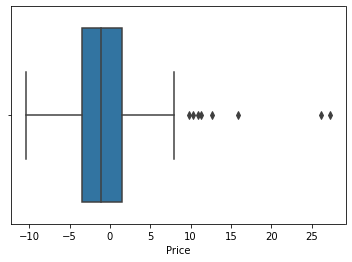

In [77]:
residual_test_rfe = y_test - y_test_pred_rfe

sns.boxplot(x = residual_test_rfe)

### Comparison of both the Models

In [78]:
res_df = pd.DataFrame({'residual_test': residual_test, 'residual_test_rfe': residual_test_rfe})

res_df.head()

,residual_test,residual_test_rfe
329,-2.289638,-4.965362
371,26.278589,27.278060
219,-6.364999,-6.759904
403,-3.822386,-2.620656
78,-0.243823,-1.920891


<AxesSubplot:>

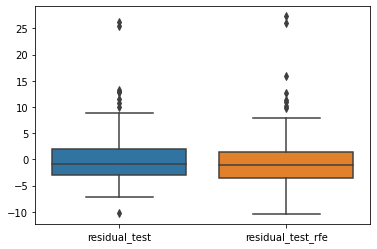

In [79]:
sns.boxplot(data = res_df)

## 4. Principal Component Analysis

<AxesSubplot:>

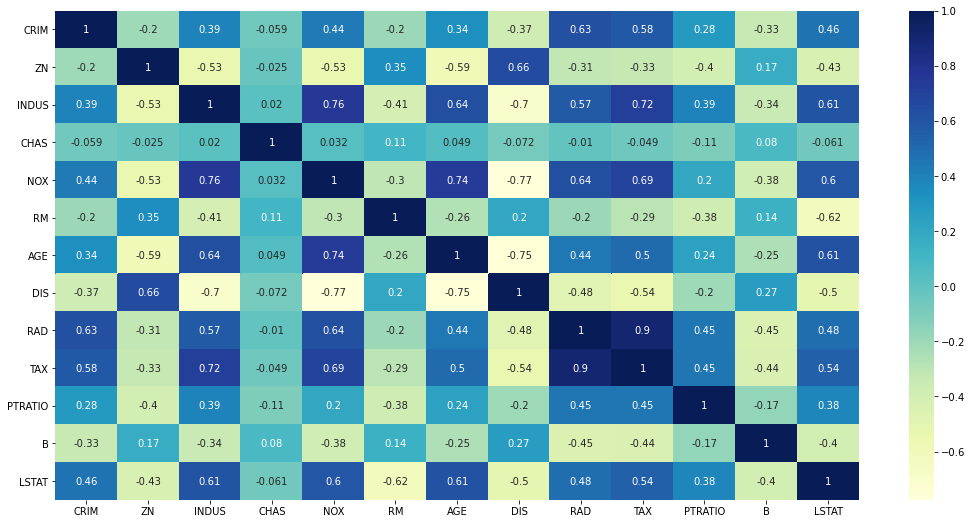

In [80]:
plt.figure(figsize=(18, 9))

sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)

In [81]:
from sklearn.decomposition import PCA

pca = PCA(random_state = 0)

pca.fit(X_train)

PCA(random_state=0)

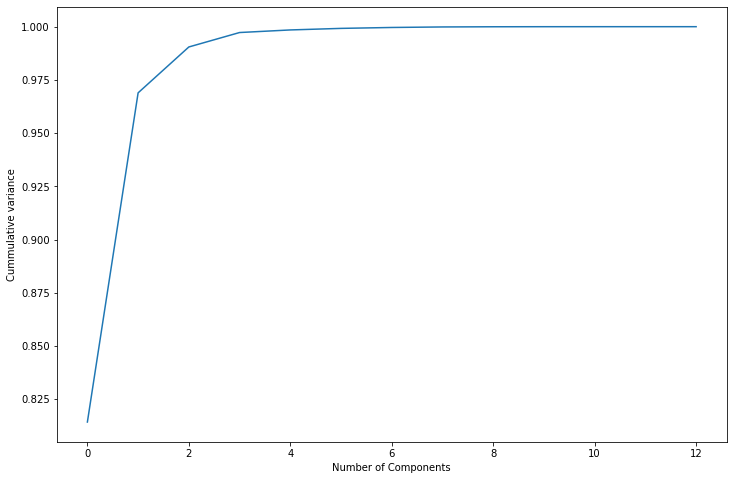

In [82]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

In [83]:
np.cumsum(pca.explained_variance_ratio_)

array([0.81427813, 0.9689209 , 0.99047253, 0.99725536, 0.99847138,
       0.99920317, 0.99963167, 0.9998757 , 0.99996255, 0.9999922 ,
       0.99999835, 0.99999993, 1.        ])

In [84]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 5, random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)

In [85]:
X_train_pca.shape

(404, 5)

<AxesSubplot:>

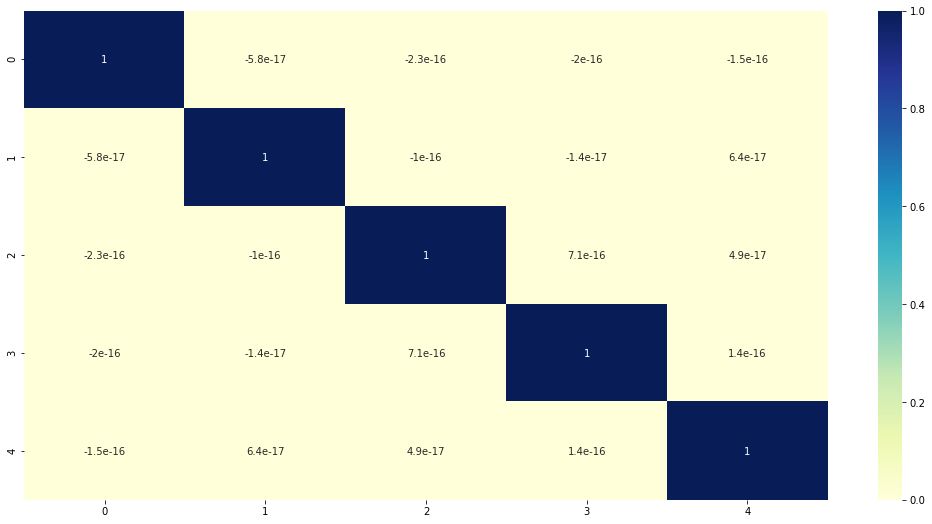

In [86]:
corrmat = np.corrcoef(X_train_pca.T)

plt.figure(figsize=(18, 9))

sns.heatmap(corrmat, cmap="YlGnBu", annot=True)

In [87]:
X_test_pca = pca_final.transform(X_test)

In [88]:
# Building the final model with 3 features

from sklearn.linear_model import LinearRegression

regressor_pca = LinearRegression()

regressor_pca.fit(X_train_pca, y_train)

LinearRegression()

In [89]:
# print coefficients and intercept

print(regressor_pca.coef_)

print(regressor_pca.intercept_)

[-0.02755174 -0.00968575  0.07709497  0.04997656 -0.28366225]
22.611881188118808


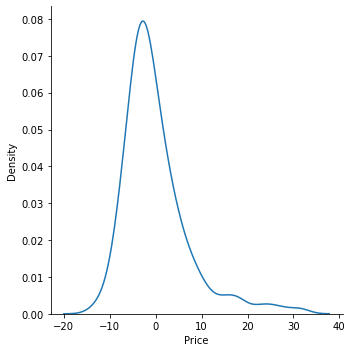

In [90]:
# Residual Analysis on Training Data

y_train_pred_pca = regressor_pca.predict(X_train_pca)

residual_pca = y_train - y_train_pred_pca

sns.displot(residual_pca, kind='kde')

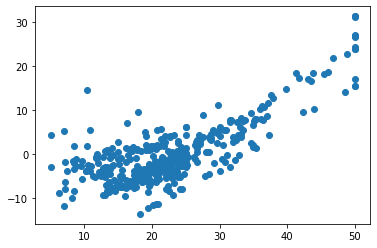

In [91]:
plt.scatter(y_train, residual_pca)

plt.show()

In [92]:
# Prediction

y_test_pred_pca = regressor_pca.predict(X_test_pca)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_pca})

temp_df.head()

,Actual,Predicted
329,22.6,23.839599
371,50.0,17.076042
219,23.0,24.016867
403,8.3,12.456989
78,21.2,23.307379


In [93]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_pca))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_pca))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_pca)))

Mean Absolute Error:  5.832272209974711
Mean Squared Error:  76.62504774022767
Root Mean Squared Error:  8.75357342690559


<AxesSubplot:xlabel='Price'>

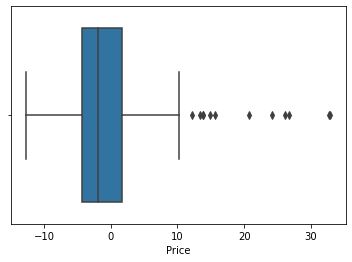

In [94]:
residual_test_pca = y_test - y_test_pred_pca

sns.boxplot(x = residual_test_pca)

In [95]:
res_df.head()

,residual_test,residual_test_rfe
329,-2.289638,-4.965362
371,26.278589,27.278060
219,-6.364999,-6.759904
403,-3.822386,-2.620656
78,-0.243823,-1.920891


In [96]:
res_df['residual_test_pca'] = residual_test_pca

res_df.head()

,residual_test,residual_test_rfe,residual_test_pca
329,-2.289638,-4.965362,-1.239599
371,26.278589,27.278060,32.923958
219,-6.364999,-6.759904,-1.016867
403,-3.822386,-2.620656,-4.156989
78,-0.243823,-1.920891,-2.107379


<AxesSubplot:>

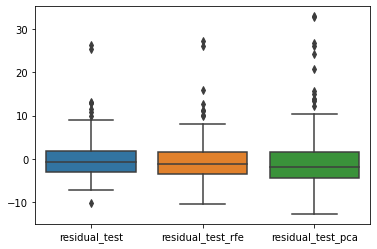

In [97]:
sns.boxplot(data = res_df)

## 5. Lasso Regularisation

In [98]:
from sklearn.linear_model import Lasso

In [99]:
regressor_lasso = Lasso(alpha=10.0)

regressor_lasso.fit(X_train, y_train)

Lasso(alpha=10.0)

In [100]:
print(regressor_lasso.intercept_)

print(regressor_lasso.coef_)

print(X_train.columns)

31.253257605149237
[-0.          0.03971165 -0.          0.          0.          0.
  0.         -0.          0.         -0.01160619 -0.          0.00655178
 -0.5339883 ]
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [101]:
importance = regressor_lasso.coef_

features = X_train.columns

print(np.array(features)[importance != 0])

print(np.array(features)[importance == 0])

['ZN' 'TAX' 'B' 'LSTAT']
['CRIM' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'PTRATIO']


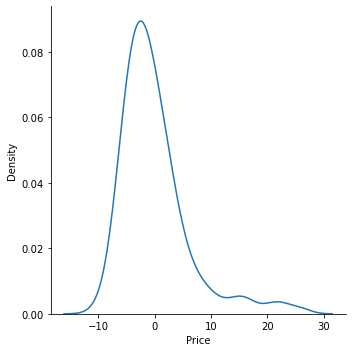

In [102]:
# Residual Analysis on Training Data

y_train_pred_lasso = regressor_lasso.predict(X_train)

residual_lasso = y_train - y_train_pred_lasso

sns.displot(residual_lasso, kind='kde')

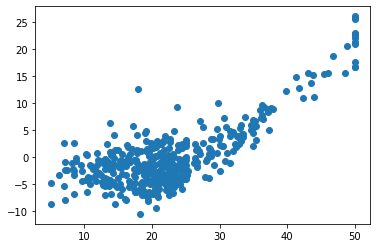

In [103]:
plt.scatter(y_train, residual_lasso)

plt.show()

In [104]:
# Prediction

y_test_pred_lasso = regressor_lasso.predict(X_test)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_lasso})

temp_df.head()

,Actual,Predicted
329,22.6,24.801415
371,50.0,20.833560
219,23.0,25.022770
403,8.3,15.566987
78,21.2,22.576186


In [105]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_lasso))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_lasso))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lasso)))

Mean Absolute Error:  4.9148725260430535
Mean Squared Error:  54.414926721278746
Root Mean Squared Error:  7.376647390331108


<AxesSubplot:xlabel='Price'>

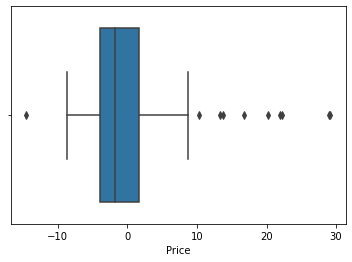

In [106]:
residual_test_lasso = y_test - y_test_pred_lasso

sns.boxplot(x = residual_test_lasso)

In [107]:
res_df['residual_test_lasso'] = residual_test_lasso

res_df.head()

,residual_test,residual_test_rfe,residual_test_pca,residual_test_lasso
329,-2.289638,-4.965362,-1.239599,-2.201415
371,26.278589,27.278060,32.923958,29.166440
219,-6.364999,-6.759904,-1.016867,-2.022770
403,-3.822386,-2.620656,-4.156989,-7.266987
78,-0.243823,-1.920891,-2.107379,-1.376186


<AxesSubplot:>

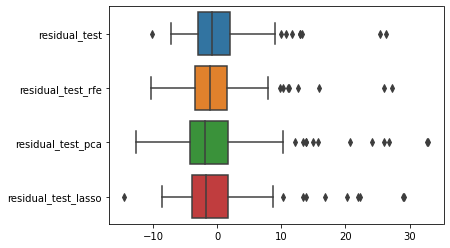

In [108]:
sns.boxplot(data = res_df, orient='h')

## 6. Feature Importance using Ensemble

In [109]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [110]:
predictions = model_rf.predict(X_test)

In [111]:
model_rf.feature_importances_

array([0.04552505, 0.00097991, 0.00894606, 0.00067848, 0.02054747,
       0.39233437, 0.01248954, 0.03911461, 0.0039328 , 0.014433  ,
       0.01942387, 0.00991285, 0.43168199])

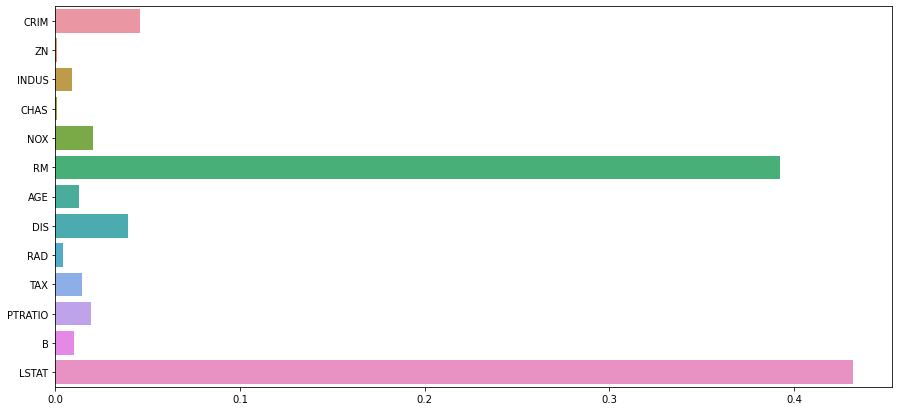

In [112]:
plt.figure(figsize=(15,7))
sns.barplot(x = model_rf.feature_importances_, y = X_train.columns, )
plt.show();